In [1]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
import matplotlib.pyplot as plt
import numpy as np

/home/gaya/miniconda3/envs/DiffMenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the model and diffusion process
model = Unet(
    dim=64,
    dim_mults=(1, 2, 4, 8)
)

In [3]:
diffusion = GaussianDiffusion(
    model=model,
    image_size=128,
    timesteps=250,      # Number of steps
)

In [4]:
# Generate random training images (for demonstration)
training_images = torch.randn(8, 3, 128, 128)

In [5]:
# Calculate loss (for demonstration)
loss = diffusion(training_images)
loss.backward()

In [6]:
sampled_images = diffusion.sample(batch_size = 2)

sampling loop time step: 100%|██████████| 250/250 [03:01<00:00,  1.38it/s]


In [7]:
# Visualization of the sampled images
def visualize_images(images):
    # Move images to CPU and convert to numpy for plotting
    images = images.cpu().detach().numpy()
    
    # Create a grid of images
    num_images = images.shape[0]
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    
    for i in range(num_images):
        # Normalize images to [0, 1] for visualization
        img = (images[i] + 1) / 2  # Assuming images are in range [-1, 1]
        img = np.clip(img, 0, 1)  # Ensure values are in [0, 1]
        
        axes[i].imshow(np.transpose(img, (1, 2, 0)))  # Change shape to (H, W, C)
        axes[i].axis('off')  # Hide axes

    plt.show()

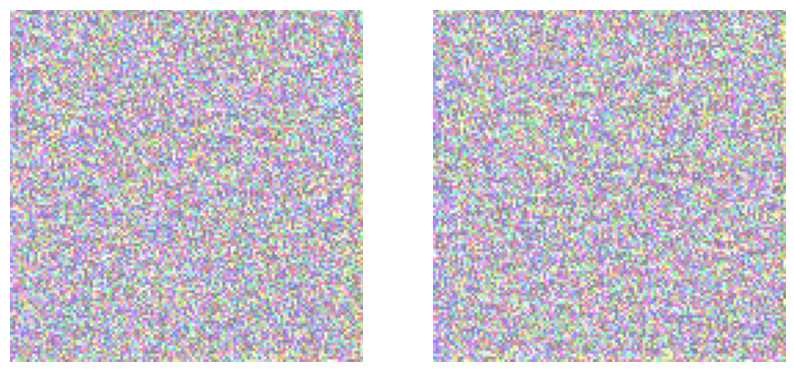

In [8]:
# Visualize the sampled images
visualize_images(sampled_images)